# Identitas Diri
* Nama: Amar Fadil
* NIM: 16520008
* Asal Universitas: ITB
* Tanggal Mengerjakan: 15 November 2020
* Sumber dataset: [Kaggle's Home Data for ML Course](https://www.kaggle.com/c/home-data-for-ml-course/data)

# Prakata

Notebook ini adalah bagian dari tugas data science yang diselenggarakan oleh DSC ITB. Untuk mengerjakan tugas ini, saya belajar terlebih dahulu di [Kaggle](https://www.kaggle.com/) dan juga [fast.ai](https://course.fast.ai/). Library yang akan saya pakai adalah:
1. `sk-learn`
2. `fastai.tabular`
3. `pandas`
4. `xgboost`
5. `tpot`

# Tahap 1 - Awalan

## 1. Setup
Saya akan memulai dengan mengimport semua module yang kita butuhkan, kemudian load dataset menjadi pandas DataFrame, serta beberapa baris kode untuk mempersiapkan data.

In [1]:
import pandas as pd
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

HOME_PATH = Path('../input/home-data-for-ml-course')
TRAIN_PATH = Path(HOME_PATH/'train.csv')
TEST_PATH = Path(HOME_PATH/'test.csv')

data = pd.read_csv(TRAIN_PATH) # kita akan melakukan splitting data manual dengan TabularPandas fastai
dep_value = 'SalePrice' # kolom yang akan kita prediksi

## 2. Data Observation
1. Mencari tahu kolom yang ada di `train_data` dan menampilkan 5 data pertama untuk mengetahui garis besar dari data yang akan diolah.

In [2]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


2. Mencari tahu statistik dasar dari kolom yang bisa dihitung (bertipe data angka)

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- `count`: Jumlah nilai data setiap baris
- `mean`: Rata-rata dari nilai data setiap baris
- `std`: Standar deviasi dari nilai data setiap baris
- `min`: Nilai terkecil dari kolom tersebut
- `max`: Nilai terbesar dari kolom tersebut
- `25%, 50%, 75%`: Nilai kuartil 1, 2, dan 3 dari kolom tersebut

## 3. Data Cleaning

Sebelum cleaning data, saya harus split data untuk train dan test. Saya akan memisahkan sekaligus preprocess/cleaning datanya dengan module `tabular` dari module `fastai`. Di bagian 1, saya menggabungkan datanya terlebih dahulu, sehingga sekarang saya akan memisahkan datanya.

In [5]:
train_cond = (data.Id<len(data)/2) # split 50%
train_i = np.where(train_cond)[0]
valid_i = np.where(~train_cond)[0] # bitwise negation untuk mendapatkan kondisi sebaliknya (test data)
split = (list(train_i), list(valid_i))

Saya akan menandakan data `continuous` dan `category` secara otomatis dengan menggunakan fungsi pembantu `cont_cat_split` dari module `tabular`

In [6]:
cont, cat = cont_cat_split(data, 1, dep_var=dep_value)

Kemudian saya akan membuat instance `TabularPandas` untuk digunakan nantinya, serta cleaning data dengan `TabularProc` (disini saya memakai `Categorify` untuk mengkategorikan kolom dengan angka, dan `FillMissing` untuk membuat data yang kosong menjadi nilai tengah dari kolom tersebut, kemudian membuat kolom boolean baru dimana semua data yang kosong akan ditandai)

In [7]:
t_data = TabularPandas(data, [Categorify, FillMissing], cat, cont, y_names=dep_value, splits=split)

## 4. Model dasar menggunakan `RandomForest`

Untuk tahap awal, saya akan membuat model dasar terlebih dahulu untuk mengetahui seberapa besar performa data untuk model awal.
Saya akan mulai dengan memisahkan `dep_value` setiap data.

In [8]:
xs, y = t_data.train.xs, t_data.train.y
valid_xs, valid_y = t_data.valid.xs, t_data.valid.y

Kemudian saya akan fungsi membuat model dengan maksimum 50 leaf.

In [9]:
# Fungsi untuk membuat dan sekaligus train model dengan RandomForest (supaya gampang atur default value)
def random_forest(iter=40, max_features=0.4, max_leaf_nodes=50, **kwargs):
    return RandomForestRegressor(n_estimators=iter, max_features=max_features, max_leaf_nodes=max_leaf_nodes, oob_score=True)

Periksa performa model menggunakan metrik MAE (Mean Absolute Error) dan membandingkan MAE prediksi test dengan MAE prediksi training (untuk memeriksa model overfit atau tidak)

In [10]:
mae = mean_absolute_error
def check_performance(model, xs, y, valid_xs, valid_y):
    model.fit(xs, y)
    print("MAE training:", mae(model.predict(xs), y))
    print("MAE test:", mae(model.predict(valid_xs), valid_y))

model = random_forest()
check_performance(model, xs, y, valid_xs, valid_y)

MAE training: 12608.616769866816
MAE test: 18973.09406655771


MAE antara keduanya sudah cukup fit. Namun kita perlu optimisasi lebih lanjut.

# Tahap 2 - Optimisasi

## 1. Interpretasi Model

Dalam menginterpretasi model, saya bisa mengetahui lebih jauh tentang data kita sebelum optimisasi model lebih lanjut. Kali ini ada 2 cara yang akan saya jelaskan untuk mengoptimisasi data.
### A. Feature Importance
Feature importance adalah salah satu interpretasi model untuk mengetahui seberapa besar pengaruh setiap kolom (feature) di data. Menggunakan atribut `feature_importances_` dari model, saya bisa mengetahui nilai tersebut. Disini saya mendefinisikan fungsi yang membuat `DataFrame` berisi setiap kolom serta nilai `feature_importances_`-nya, diurutkan dari yang paling besar.

In [11]:
def feature_importance(model, data):
    return pd.DataFrame({'features': data.columns, 'importance': model.feature_importances_}).sort_values('importance', ascending=False)

Kemudian kita bisa mendapatkan nilainya dan menampilkan plot 40 kolom dengan nilai `importance` yang paling besar.

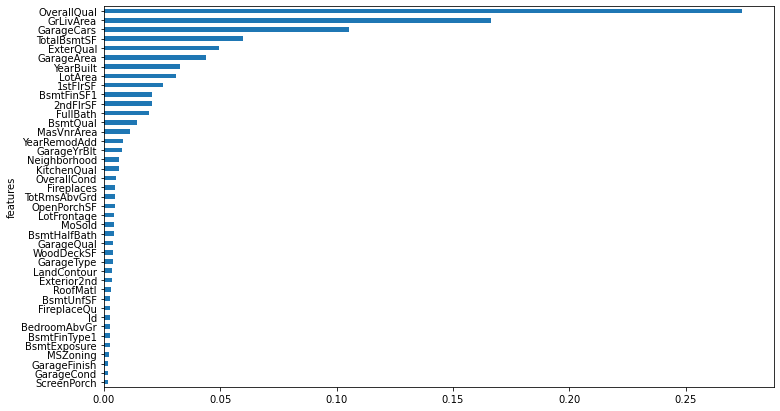

In [12]:
fi = feature_importance(model, xs)
fi[40::-1].plot('features', 'importance', 'barh', figsize=(12,7), legend=False)

Bisa dilihat dari plot tersebut, mulai dari `MSSubClass` hingga kebawah (masih ada 41 feature lagi!) mempunyai nilai importance yang sangat kecil. Oleh karena itu, saya akan memangkas data sehingga kolom yang mempunyai nilai importance lumayan besar (> 0.003) akan diambil.


In [13]:
pick = fi[fi.importance>0.003].features
xs_i = xs[pick]
valid_xs_i = valid_xs[pick]
pick.sort_values().values

array(['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtHalfBath', 'BsmtQual',
       'ExterQual', 'Exterior2nd', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'GrLivArea', 'KitchenQual', 'LandContour', 'LotArea',
       'LotFrontage', 'MasVnrArea', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'RoofMatl',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd'], dtype=object)

Sekarang, saya akan mempunyai data dengan 27 kolom saja. Selanjutnya, saya ingin mengetahui performa modelnya.

In [14]:
model_i = random_forest()
check_performance(model_i, xs_i, y, valid_xs_i, valid_y)

MAE training: 12857.992720720373
MAE test: 18956.7076827512


Memang perubahan yang tidak signifikan, tapi data yang diolah jauh lebih sedikit daripada sebelumnya.

## 2. XGBoost

XGBoost adalah salah satu modul gradient boosting yang sangat efisien dan teroptimisasi. Gradient boosting bisa digunakan untuk salah satu optimisasi model.

Pertama, saya akan membuat data baru untuk

In [21]:
data_nn = pd.read_csv(TRAIN_PATH)
data_nn = data_nn[list(xs_i.columns) + [dep_value]]
cont_nn, cat_nn = cont_cat_split(data_nn, max_card=100, dep_var=dep_value)
t_data_nn = TabularPandas(data_nn, [Categorify, FillMissing, Normalize], cat_nn, cont_nn, splits=split, y_names=dep_value)

In [41]:
from xgboost import XGBRegressor
clf = XGBRegressor()
xs_nn, y_nn = t_data_nn.train.xs, t_data_nn.train.y
valid_xs_nn, valid_y_nn = t_data_nn.valid.xs, t_data_nn.valid.y
clf.fit(xs_nn, y_nn)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
check_performance(clf, xs_nn, y_nn, valid_xs_nn, valid_y_nn)

MAE training: 311.95126564643346
MAE test: 18446.33150756669


Jelas sekali terjadi overfit. Kita harus melakukan tuning hyperparameter sendiri agar tidak overfit dan mempunyai MAE yang bagus.

## 3. TPOT (AutoML)

TPOT adalah Python Automated Machine Learning tool yang mengoptimasi model machine learning menggunakan genetic programming (iterasi setiap generasi dengan populasi). TPOT adalah tool yang sangat mudah dan cukup efektif, namun membutuhkan waktu yang lama untuk di training.

Menggunakan dataset yang dipakai untuk XGBoost sebelumnya, saya mencoba untuk menggunakan TPOT.

In [44]:
from tpot import TPOTRegressor
tp = TPOTRegressor(generations=5, population_size=20, cv=5, random_state=42, verbosity=2)
xs_nn, y_nn = t_data_nn.train.xs, t_data_nn.train.y
valid_xs_nn, valid_y_nn = t_data_nn.valid.xs, t_data_nn.valid.y
tp.fit(xs_nn, y_nn)
check_performance(tp, xs_nn, y_nn, valid_xs_nn, valid_y_nn)


Generation 1 - Current best internal CV score: -1057994645.0232031

Generation 2 - Current best internal CV score: -1057994645.0232031

Generation 3 - Current best internal CV score: -932123910.1012504

Generation 4 - Current best internal CV score: -932123910.1012504

Generation 5 - Current best internal CV score: -932123910.1012504

Best pipeline: RandomForestRegressor(LassoLarsCV(input_matrix, normalize=False), bootstrap=True, max_features=0.7500000000000001, min_samples_leaf=11, min_samples_split=9, n_estimators=100)



Generation 1 - Current best internal CV score: -1057994645.0232031

Generation 2 - Current best internal CV score: -1057994645.0232031

Generation 3 - Current best internal CV score: -932123910.1012504

Generation 4 - Current best internal CV score: -932123910.1012504

Generation 5 - Current best internal CV score: -932123910.1012504

Best pipeline: RandomForestRegressor(LassoLarsCV(input_matrix, normalize=False), bootstrap=True, max_features=0.7500000000000001, min_samples_leaf=11, min_samples_split=9, n_estimators=100)
MAE training: 14249.458361898616
MAE test: 17051.614242178497


Terlihat MAE testnya lumayan bagus dibandingkan dengan model-model sebelumnya.